# Generate plots in the following paper:
Eisenman, Basinski-Ferris, Beer, and Zanna. The sensitivity of the spatial pattern of sea level changes to the depth of Antarctic meltwater fluxes. Geophysical Research Letters, 2024.<br>
This script and the MITgcm output data it uses are available at https://eisenman-group.github.io

In [1]:
import netCDF4 as nc4
import numpy as np
import numpy.matlib as mat
import matplotlib.pyplot as plt
import matplotlib.colorbar as cbar
import cmocean.cm as cmo
import xarray as xr
import gsw

# Load Data

In [2]:
grid = xr.open_dataset('grid.nc')
control_run = xr.open_dataset('control.ssh.nc')
FW_perturbation_run = xr.open_dataset('FW_perturbation.ssh.nc')

ts = 60*60*24*360

# Fig. 2

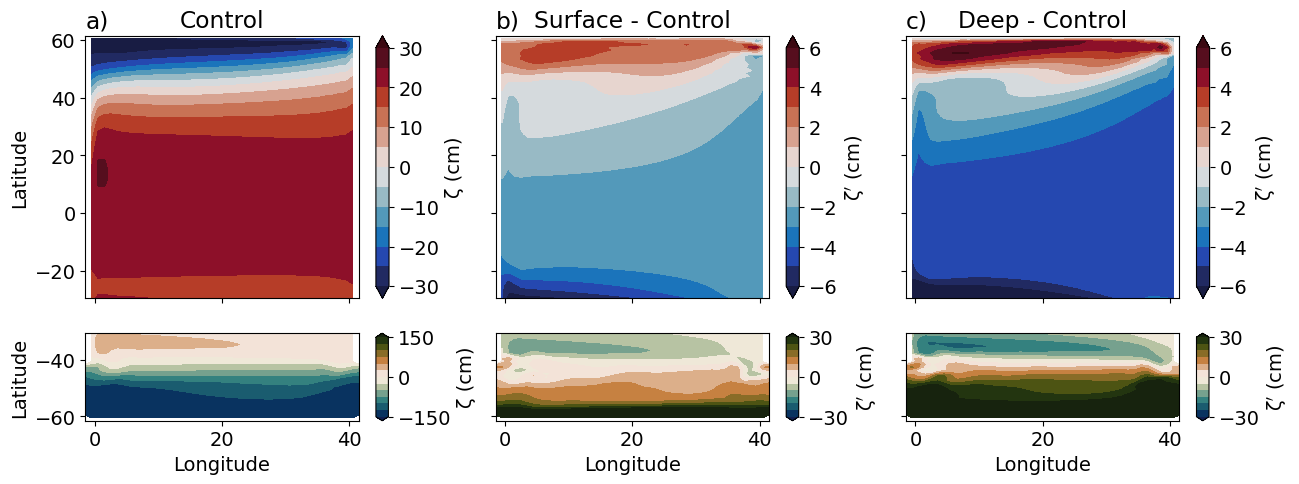

In [3]:
# set font size

SMALL_SIZE = 10*1.4
BIG_SIZE = 12*1.4

plt.rc('axes', titlesize=BIG_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=SMALL_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize

###

def remove_global_mean(field):
    # remove global mean 
    da = grid.dx*grid.dy
    dA = da.where(FW_perturbation_run.SALT_s[-1,0,:,:]>1)
    field_gm0 = field - ((field*dA).sum(dim=['X','Y']))/dA.sum()
    return field_gm0

fig1a = plt.figure(figsize=(15,5))

from matplotlib import gridspec
spec = gridspec.GridSpec(ncols=3, nrows=2, width_ratios=[2, 2, 2], height_ratios=[3, 1])

xx1,yy1 = np.meshgrid(grid.X[::2],grid.Y[32::2])
xx2,yy2 = np.meshgrid(grid.X[::2],grid.Y[0:32:2])

ssh_nr = remove_global_mean(control_run.sshanom_nr)
ssh_s = remove_global_mean(FW_perturbation_run.sshanom_s)
ssh_d = remove_global_mean(FW_perturbation_run.sshanom_d)

ax1 = plt.subplot(spec[0])
plt.contourf(grid.x,grid.y[32:],100*np.mean(ssh_nr[231:240,32:,:], axis=0),\
             levels=np.arange(-30,31,5), cmap=cmo.balance,extend="both")
plt.colorbar(label='ζ (cm)')
plt.ylabel('Latitude')
ax1.set_xticklabels([])
plt.title('Control')
plt.title('a)',loc='left')

ax1 = plt.subplot(spec[1])
plt.contourf(grid.x,grid.y[32:],100*np.mean(ssh_s[231:240,32:,:]-ssh_nr[231:240,32:,:], axis=0),\
             levels=np.arange(-6,6.5,1), cmap=cmo.balance, extend="both")
plt.colorbar(label='ζ$^\\prime$ (cm)')
ax1.set_xticklabels([])
ax1.set_yticklabels([])
plt.title('Surface - Control')
plt.title('b)',loc='left')

ax2 = plt.subplot(spec[2])
plt.contourf(grid.x,grid.y[32:],100*np.mean(ssh_d[231:240,32:,:]-ssh_nr[231:240,32:,:], axis=0),\
             levels=np.arange(-6,6.5,1), cmap=cmo.balance, extend="both")
plt.colorbar(label='ζ$^\\prime$ (cm)')
ax2.set_xticklabels([])
ax2.set_yticklabels([])
plt.title('Deep - Control')
plt.title('c)',loc='left')

ax3 = plt.subplot(spec[3])
plt.contourf(grid.x,grid.y[0:32],100*np.mean(ssh_nr[231:240,0:32,:], axis=0),\
           levels=np.arange(-150,151,25),cmap=cmo.tarn_r, extend="both")
plt.ylabel('Latitude')
plt.xlabel('Longitude')
cax1, _=cbar.make_axes(ax3, aspect=7)
plt.colorbar(label='ζ (cm)',ticks=[-150,0,150],cax=cax1)

ax4 = plt.subplot(spec[4])
plt.contourf(grid.x,grid.y[0:32],100*np.mean(ssh_s[231:240,0:32,:]-ssh_nr[231:240,0:32,:], axis=0),\
             levels=np.arange(-30,31,5),cmap=cmo.tarn_r, extend="both")
plt.xlabel('Longitude')
cax1, _=cbar.make_axes(ax4, aspect=7)
plt.colorbar(label='ζ$^\\prime$ (cm)',ticks=[-30,0,30],cax=cax1)
ax4.set_yticklabels([])

ax5 = plt.subplot(spec[5])
ax5.set_yticklabels([])
plt.contourf(grid.x,grid.y[0:32],100*np.mean(ssh_d[231:240,0:32,:]-ssh_nr[231:240,0:32,:], axis=0),\
             levels=np.arange(-30,31,5),cmap=cmo.tarn_r, extend="both")
plt.xlabel('Longitude');
cax1, _=cbar.make_axes(ax5, aspect=7)
plt.colorbar(label='ζ$^\\prime$ (cm)',ticks=[-30,0,30],cax=cax1)
plt.show()

# Fig. 3

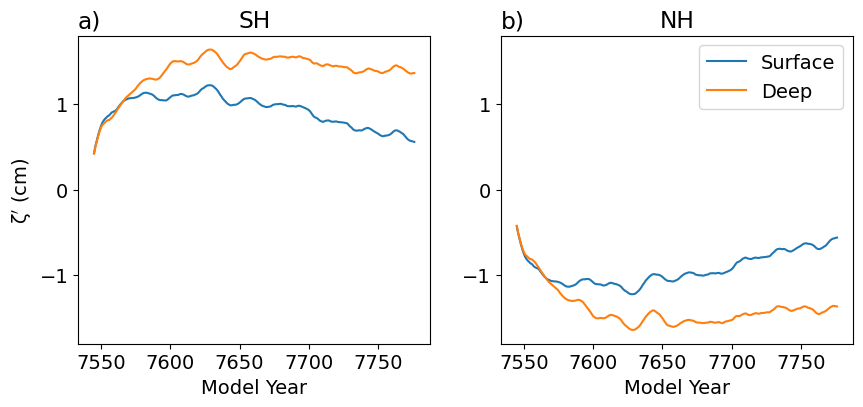

In [4]:
fig1d = plt.figure(figsize=(10,4))

# remove global mean 
da = grid.dx*grid.dy
dA = da.where(FW_perturbation_run.SALT_s[-1,0,:,:]>1)

ssh_controls_mean = (control_run.sshanom_nr.isel(Y=slice(0,62))*dA).sum(dim=['X','Y'])/dA.sum()
ssh_controln_mean = (control_run.sshanom_nr.isel(Y=slice(62,124))*dA).sum(dim=['X','Y'])/dA.sum()
ssh_surfs_mean = (FW_perturbation_run.sshanom_s.isel(Y=slice(0,62))*dA).sum(dim=['X','Y'])/dA.sum()
ssh_surfn_mean = (FW_perturbation_run.sshanom_s.isel(Y=slice(62,124))*dA).sum(dim=['X','Y'])/dA.sum()
ssh_deeps_mean = (FW_perturbation_run.sshanom_d.isel(Y=slice(0,62))*dA).sum(dim=['X','Y'])/dA.sum()
ssh_deepn_mean = (FW_perturbation_run.sshanom_d.isel(Y=slice(62,124))*dA).sum(dim=['X','Y'])/dA.sum()

# 10 year rolling average 
ssh_controls = ssh_controls_mean.rolling(T=10,center=True).mean().values*100
ssh_controln = ssh_controln_mean.rolling(T=10,center=True).mean().values*100
ssh_surfs = ssh_surfs_mean.rolling(T=10,center=True).mean().values*100
ssh_surfn = ssh_surfn_mean.rolling(T=10,center=True).mean().values*100
ssh_deeps = ssh_deeps_mean.rolling(T=10,center=True).mean().values*100
ssh_deepn = ssh_deepn_mean.rolling(T=10,center=True).mean().values*100

plt.subplot(121)
plt.plot(FW_perturbation_run.dynT_s/ts+1000,ssh_surfs-ssh_controls,label='Surface')
plt.plot(FW_perturbation_run.dynT_d/ts+1000,ssh_deeps-ssh_controls,label='Deep')
plt.title('SH')
plt.title('a)',loc='left')
plt.ylabel('ζ$^\\prime$ (cm)')
plt.xlabel('Model Year')
plt.ylim(-1.8, 1.8)

plt.subplot(122)
plt.plot(FW_perturbation_run.dynT_s/ts+1000,ssh_surfn-ssh_controln,label='Surface')
plt.plot(FW_perturbation_run.dynT_d/ts+1000,ssh_deepn-ssh_controln,label='Deep')
plt.xlabel('Model Year')
plt.title('NH')
plt.title('b)',loc='left')
plt.ylim(-1.8, 1.8)
plt.legend(loc='upper right')
plt.show()

# SSH decomposition

In [5]:
# define terms for control run
rho0 = 1035
g = 9.81
H = grid.zp1[-1]
dz = -grid.zp1[1:].values + grid.zp1[0:-1].values

rhoanom_nr = control_run.rhoA_nr+rho0
eta_nr = control_run.sshanom_nr + control_run.etamean_nr
dz_nr = np.transpose(np.tile(dz,[241,124,44,1]),[0,3,1,2])
dz_nr[:,0,:,:] = dz_nr[:,0,:,:] + eta_nr
pb_nr = g*np.sum(rhoanom_nr*dz_nr,1)

In [6]:
# define terms for surface run 01
rhoanom_s01 = FW_perturbation_run.rhoA_s+rho0
eta_s01 = FW_perturbation_run.sshanom_s + FW_perturbation_run.etamean_s
dz_s01 = np.transpose(np.tile(dz,[241,124,44,1]),[0,3,1,2])
dz_s01[:,0,:,:] = dz_s01[:,0,:,:] + eta_s01
pb_s01 = g*np.sum(rhoanom_s01*dz_s01,1)

In [7]:
# define terms for deep run 01
rhoanom_d01 = FW_perturbation_run.rhoA_d+rho0
eta_d01 = FW_perturbation_run.sshanom_d + FW_perturbation_run.etamean_d
dz_d01 = np.transpose(np.tile(dz,[241,124,44,1]),[0,3,1,2])
dz_d01[:,0,:,:] = dz_d01[:,0,:,:] + eta_d01
pb_d01 = g*np.sum(rhoanom_d01*dz_d01,1)

In [8]:
# calculate terms 
eta_prime_s = eta_s01 - eta_nr
term2_s = (-1/rho0)*np.sum((rhoanom_s01-rhoanom_nr)*dz_s01,1)
term1_s = (pb_s01-pb_nr)/(rho0*g)

eta_prime_d = eta_d01 - eta_nr
term2_d = (-1/rho0)*np.sum((rhoanom_d01-rhoanom_nr)*dz_d01,1)
term1_d = (pb_d01-pb_nr)/(rho0*g)

In [9]:
# remove global mean 
da = grid.dx*grid.dy
dA = da.where(FW_perturbation_run.SALT_s[-1,0,:,:]>1)

Eta_prime_s = eta_prime_s-((eta_prime_s*dA).sum(dim=['X','Y']))/dA.sum()
Term1_s = term1_s-((term1_s*dA).sum(dim=['X','Y']))/dA.sum()
Term2_s = term2_s-((term2_s*dA).sum(dim=['X','Y']))/dA.sum()

Eta_prime_d = eta_prime_d-((eta_prime_d*dA).sum(dim=['X','Y']))/dA.sum()
Term1_d = term1_d-((term1_d*dA).sum(dim=['X','Y']))/dA.sum()
Term2_d = term2_d-((term2_d*dA).sum(dim=['X','Y']))/dA.sum()

In [10]:
# Nothern hemisphere mean 

Eta_prime_s_NHmean = (Eta_prime_s.isel(Y=slice(62,124))*dA).sum(dim=['X','Y'])/dA.sum()
Term1_s_NHmean = (Term1_s.isel(Y=slice(62,124))*dA).sum(dim=['X','Y'])/dA.sum()
Term2_s_NHmean = (Term2_s.isel(Y=slice(62,124))*dA).sum(dim=['X','Y'])/dA.sum()

Eta_prime_d_NHmean = (Eta_prime_d.isel(Y=slice(62,124))*dA).sum(dim=['X','Y'])/dA.sum()
Term1_d_NHmean = (Term1_d.isel(Y=slice(62,124))*dA).sum(dim=['X','Y'])/dA.sum()
Term2_d_NHmean = (Term2_d.isel(Y=slice(62,124))*dA).sum(dim=['X','Y'])/dA.sum()

# Southern hemisphere mean 

Eta_prime_s_SHmean = (Eta_prime_s.isel(Y=slice(0,62))*dA).sum(dim=['X','Y'])/dA.sum()
Term1_s_SHmean = (Term1_s.isel(Y=slice(0,62))*dA).sum(dim=['X','Y'])/dA.sum()
Term2_s_SHmean = (Term2_s.isel(Y=slice(0,62))*dA).sum(dim=['X','Y'])/dA.sum()

Eta_prime_d_SHmean = (Eta_prime_d.isel(Y=slice(0,62))*dA).sum(dim=['X','Y'])/dA.sum()
Term1_d_SHmean = (Term1_d.isel(Y=slice(0,62))*dA).sum(dim=['X','Y'])/dA.sum()
Term2_d_SHmean = (Term2_d.isel(Y=slice(0,62))*dA).sum(dim=['X','Y'])/dA.sum()

# Fig. 4

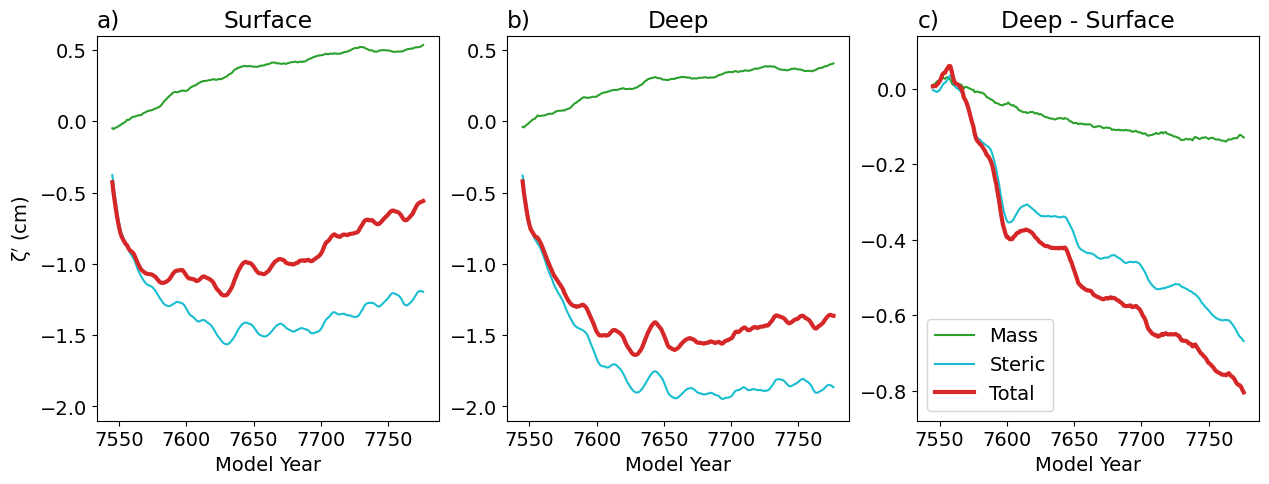

In [11]:
fig2b = plt.figure(figsize=(15,5))

# 10 year rolling average 
sfc1 = Term1_s_NHmean.rolling(T=10,center=True).mean().values*100
sfc2 = Term2_s_NHmean.rolling(T=10,center=True).mean().values*100
sfc3 = Eta_prime_s_NHmean.rolling(T=10,center=True).mean().values*100
deep1 = Term1_d_NHmean.rolling(T=10,center=True).mean().values*100
deep2 = Term2_d_NHmean.rolling(T=10,center=True).mean().values*100
deep3 = Eta_prime_d_NHmean.rolling(T=10,center=True).mean().values*100


ax1=plt.subplot(131)
plt.plot(FW_perturbation_run.dynT_s/ts+1000,sfc1,label='Mass', color="#2ca02c")
plt.plot(FW_perturbation_run.dynT_s/ts+1000,sfc2,label='Steric', color="#17becf")
plt.plot(FW_perturbation_run.dynT_s/ts+1000,sfc3,label='Total', color="#d62728",linewidth=3.0)
plt.ylim(-0.021*100, 0.006*100)
plt.ylabel('ζ$^\\prime$ (cm)')
plt.xlabel('Model Year')
plt.title('Surface')
plt.title('a)',loc='left')
ax1.set_xticks([7550,7600,7650,7700,7750])

ax2=plt.subplot(132)
plt.plot(FW_perturbation_run.dynT_s/ts+1000,deep1,label='Mass', color="#2ca02c")
plt.plot(FW_perturbation_run.dynT_s/ts+1000,deep2,label='Steric', color="#17becf")
plt.plot(FW_perturbation_run.dynT_s/ts+1000,deep3,label='Total', color="#d62728",linewidth=3.0)
plt.ylim(-0.021*100, 0.006*100)
plt.xlabel('Model Year')
plt.title('Deep')
plt.title('b)',loc='left')
ax2.set_xticks([7550,7600,7650,7700,7750])

ax3=plt.subplot(133)
plt.plot(FW_perturbation_run.dynT_s/ts+1000,deep1-sfc1,label='Mass', color="#2ca02c")
plt.plot(FW_perturbation_run.dynT_s/ts+1000,deep2-sfc2,label='Steric', color="#17becf")
plt.plot(FW_perturbation_run.dynT_s/ts+1000,deep3-sfc3,label='Total', color="#d62728",linewidth=3.0)
plt.ylim(-0.88, 0.14)
plt.xlabel('Model Year')
plt.title('Deep - Surface')
plt.title('c)',loc='left');
ax3.set_xticks([7550,7600,7650,7700,7750]);
plt.legend(loc='lower left');